<a href="https://colab.research.google.com/github/mikedcurry/DS-Unit-2-Regression-Classification/blob/master/Curry_211_assignment_regression_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?
- [ ] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [49]:
df.shape


(49352, 34)

In [5]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
pd.options.display.float_format = '{:,.0f}'.format

In [47]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
max,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


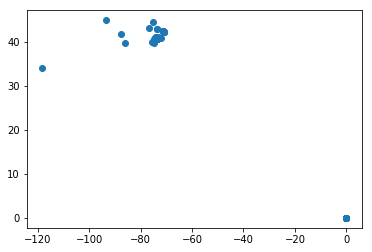

In [51]:
# Looking at distribution of placed to rent by longitude and latitude

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['longitude'], df['latitude'])


#Can't tell now many dots are here. It looks like a few far out places are making the data's variance pretty big

(array([1.0000e+00, 0.0000e+00, 3.0000e+00, 4.9336e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01]),
 array([-118.271 , -106.4439,  -94.6168,  -82.7897,  -70.9626,  -59.1355,
         -47.3084,  -35.4813,  -23.6542,  -11.8271,    0.    ]),
 <a list of 10 Patch objects>)

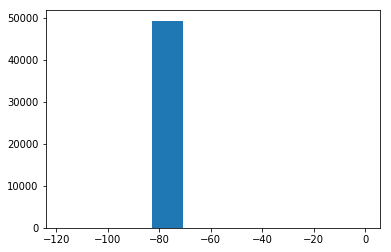

In [19]:
plt.hist(df['longitude'])

(array([1.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 4.9335e+04]),
 array([ 0.     ,  4.48835,  8.9767 , 13.46505, 17.9534 , 22.44175,
        26.9301 , 31.41845, 35.9068 , 40.39515, 44.8835 ]),
 <a list of 10 Patch objects>)

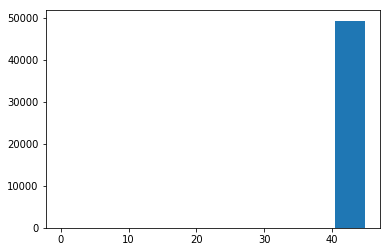

In [20]:
plt.hist(df['latitude'])

In [41]:
df.query('longitude > -60').shape

(12, 34)

In [42]:
df.query('longitude < -82').shape

(4, 34)

In [52]:
#I'm going ahead and cutting out 16 locations that are out the range of the other data points. 

mask = (df['longitude'] < -60) & (df['longitude'] > -82)
df = df[mask]

df.shape

# Verify by relating to (49352, 34). Good. 

(49336, 34)

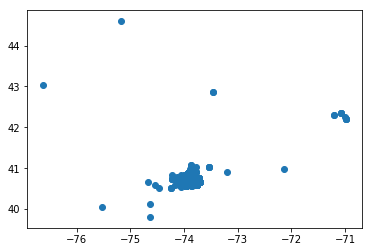

In [54]:
plt.scatter(df['longitude'], df['latitude']);

In [59]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [63]:
df['price'].describe()

count      49,336
mean        3,830
std        22,070
min            43
25%         2,500
50%         3,150
75%         4,100
max     4,490,000
Name: price, dtype: float64

In [77]:
df['price'].describe()

# This is a much more reasonable standard deviation

count   49,317
mean     3,652
std      2,192
min         43
25%      2,500
50%      3,150
75%      4,100
max     48,500
Name: price, dtype: float64

In [73]:
df.query('price > 50000').shape


(16, 34)

In [74]:
#Just so I can see my graphs better, I'm going to chop off the upper end of this data set in the price range. 
# Not sure if this is totally legit. I don't acutally see anything wrong with these values. 

mask = (df['price'] < 50000)
df = df[mask]
df.shape

(49317, 34)

In [0]:
import seaborn as sns

In [0]:
columns = ['bathrooms', 'bedrooms', 'price', 'hardwood_floors', 'new_construction', 'exclusive']
df2 = df[columns]

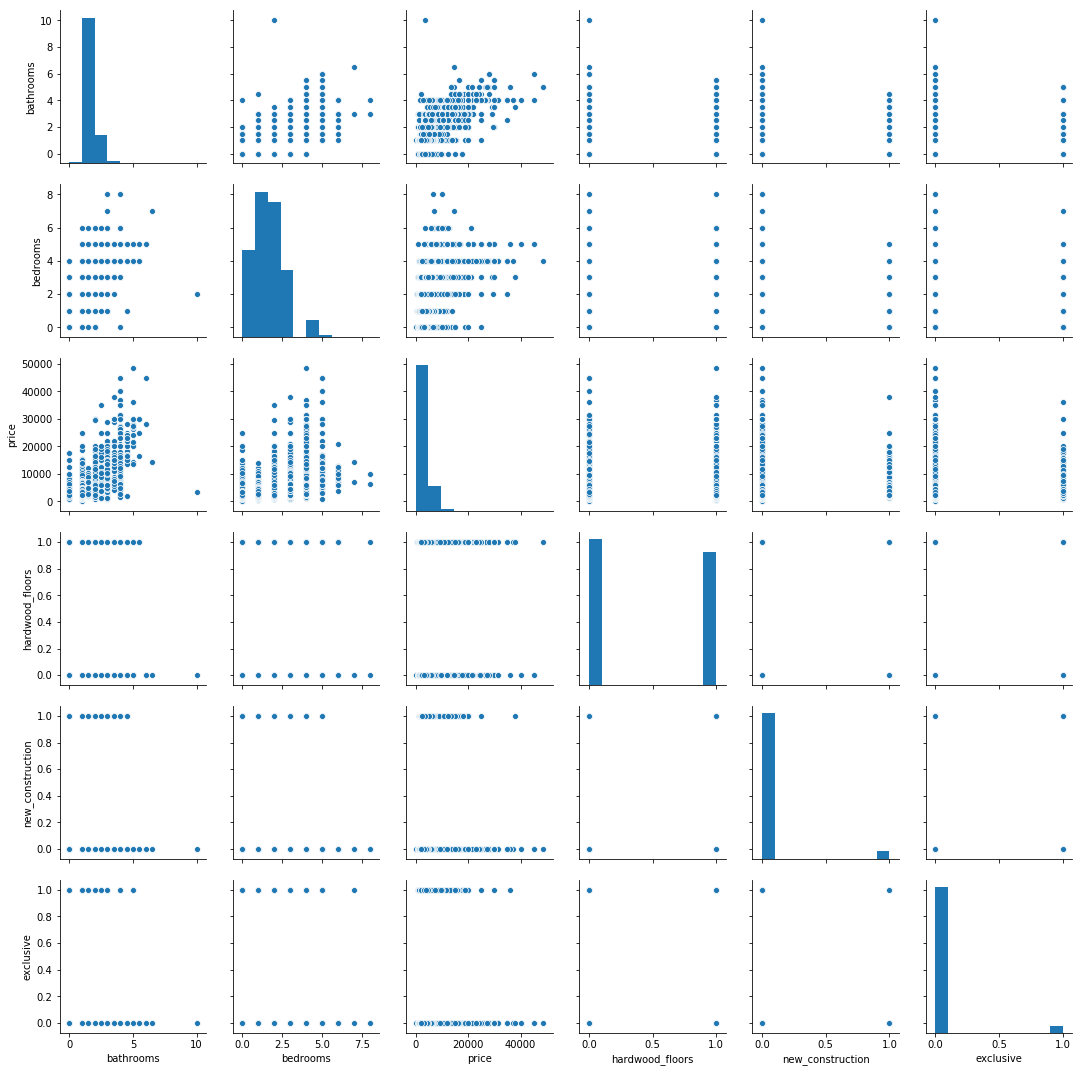

In [76]:
sns.pairplot(df2)

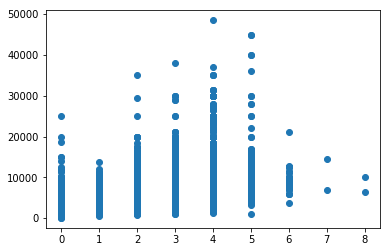

In [78]:
plt.scatter(df['bedrooms'], df['price']);

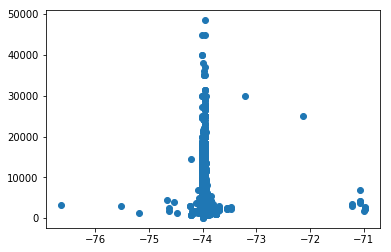

In [79]:
#meaningless... well, okay, so it shows pretty clearly a centeral location

plt.scatter(df['longitude'], df['price']);

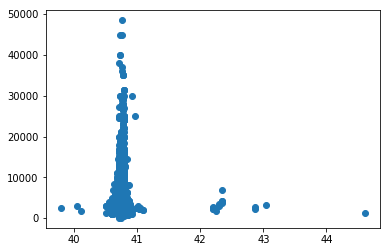

In [80]:
# more centralized location 
plt.scatter(df['latitude'], df['price']);

In [0]:
import plotly.express as px


In [89]:
px.scatter(df, x='bedrooms', y='price', trendline='ols', opacity=0.05)

In [90]:
px.scatter(df, x='bathrooms',y='price', trendline='ols', opacity=.05)

In [0]:
# 1.  import my model
from sklearn.linear_model import LinearRegression

# 2. This will make more sense when we start runnning multiple models through instances...
model = LinearRegression()

# 3. Arrange X feature matrix & y target vector... in a minute I'll come back and run both at the same time...
features = ['bedrooms']
target = ['price']
X = df[features]
Y = df[target]

# 4. Fit the model
model.fit(X,Y)

# 5. Apply the model 
y_pred = model.predict(X)

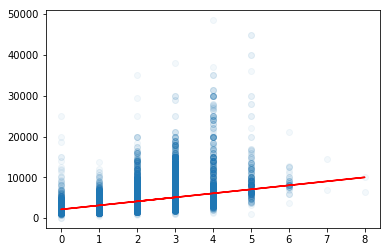

In [119]:
#Okay sure. 

plt.scatter(X,Y, alpha=.05);
plt.plot(X,y_pred, color='r');

In [0]:

features1 = ['bathrooms']

X1 = df[features]

# 4. Fit the model
model.fit(X1,Y)

# 5. Apply the model 
y_pred1 = model.predict(X1)

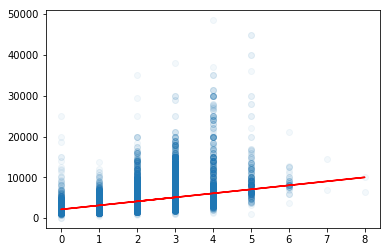

In [121]:
plt.scatter(X1,Y,alpha=.05);
plt.plot(X1,y_pred1,color='r');

In [0]:
from mpl_toolkits.mplot3d import Axes3D


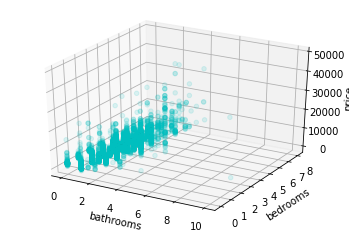

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['bathrooms']
y = df['bedrooms']
z = df['price']



ax.scatter(x, y, z, c='c', alpha=.12, marker='o')

ax.set_xlabel('bathrooms')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')

plt.show()

In [0]:
# Pick model

regress_3d = LinearRegression()

In [135]:
# Fit model / tell it what to fit to

regress_3d.fit(df[['bedrooms', 'bathrooms']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
import numpy as np

In [141]:
# Use model to predict 

regress_3d.predict(np.array([[3, 5]]))

array([14302.34443258])

In [142]:
def predict_price(beds,baths):
    f2_pred = regress_3d.predict(np.array([[beds, baths]])) 
    grab_num = f2_pred[0] # grabbing the only value in the output np array
    
    return f'Estimated Cost of rent: ${grab_num: .0f}'
  
predict_price(3,5)

'Estimated Cost of rent: $ 14302'

In [0]:
from ipywidgets import interact


In [148]:
interact(predict_price, beds=(0,7), baths=(0,10));

interactive(children=(IntSlider(value=3, description='beds', max=7), IntSlider(value=5, description='baths', m…

In [0]:
#As One Code Block, see: https://colab.research.google.com/drive/1KB5CIjDSEb1L3BPv3ct3fvtl0ZuDHAl8